# Harmonic Functions: Theory and Computation

## 1. Introduction

Harmonic functions are fundamental objects in mathematical physics, complex analysis, and potential theory. They arise naturally in the study of steady-state heat conduction, electrostatics, fluid flow, and gravitational potentials.

## 2. Mathematical Definition

A twice continuously differentiable function $u: \Omega \subset \mathbb{R}^n \to \mathbb{R}$ is **harmonic** if it satisfies Laplace's equation:

$$\Delta u = 0$$

where $\Delta$ is the Laplacian operator:

$$\Delta u = \sum_{i=1}^{n} \frac{\partial^2 u}{\partial x_i^2}$$

In two dimensions:

$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0$$

## 3. Key Properties

### 3.1 Mean Value Property

If $u$ is harmonic in a domain $\Omega$, then for any point $x_0 \in \Omega$ and any ball $B_r(x_0) \subset \Omega$:

$$u(x_0) = \frac{1}{|\partial B_r|} \int_{\partial B_r} u(s) \, ds$$

In other words, the value at the center equals the average value over any surrounding sphere.

### 3.2 Maximum Principle

If $u$ is harmonic in a bounded domain $\Omega$ and continuous on $\overline{\Omega}$, then:

$$\max_{x \in \overline{\Omega}} u(x) = \max_{x \in \partial \Omega} u(x)$$

$$\min_{x \in \overline{\Omega}} u(x) = \min_{x \in \partial \Omega} u(x)$$

Harmonic functions achieve their extrema on the boundary.

### 3.3 Connection to Complex Analysis

If $f(z) = u(x,y) + i v(x,y)$ is holomorphic, then both $u$ and $v$ are harmonic. The real and imaginary parts of any analytic function are harmonic functions satisfying the Cauchy-Riemann equations:

$$\frac{\partial u}{\partial x} = \frac{\partial v}{\partial y}, \quad \frac{\partial u}{\partial y} = -\frac{\partial v}{\partial x}$$

## 4. Examples of Harmonic Functions

1. **Linear functions**: $u(x,y) = ax + by + c$
2. **Quadratic**: $u(x,y) = x^2 - y^2$
3. **Logarithmic**: $u(x,y) = \log(x^2 + y^2)$ (harmonic except at origin)
4. **Polynomial**: $u(x,y) = \text{Re}(z^n)$ for $z = x + iy$

## 5. Computational Exploration

We will numerically verify the properties of harmonic functions and visualize several examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

## 6. Example 1: Verifying Laplace's Equation

We define several candidate functions and numerically compute their Laplacians.

In [2]:
def compute_laplacian_2d(u, dx=0.1, dy=0.1):
    """
    Compute the discrete Laplacian using finite differences:
    Δu ≈ (u[i+1,j] + u[i-1,j] - 2u[i,j])/dx² + (u[i,j+1] + u[i,j-1] - 2u[i,j])/dy²
    """
    u_xx = (np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) - 2*u) / dx**2
    u_yy = (np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) - 2*u) / dy**2
    return u_xx + u_yy

# Create grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Define harmonic functions
u1 = X**2 - Y**2  # Real part of z²
u2 = 2*X*Y        # Imaginary part of z²
u3 = X            # Linear function

# Define non-harmonic function
u4 = X**2 + Y**2  # Not harmonic

# Compute Laplacians
laplacian_u1 = compute_laplacian_2d(u1, dx, dy)
laplacian_u2 = compute_laplacian_2d(u2, dx, dy)
laplacian_u3 = compute_laplacian_2d(u3, dx, dy)
laplacian_u4 = compute_laplacian_2d(u4, dx, dy)

print("Verification of Laplace's Equation (Δu = 0):")
print(f"u₁(x,y) = x² - y²:  max|Δu| = {np.max(np.abs(laplacian_u1)):.6e}")
print(f"u₂(x,y) = 2xy:      max|Δu| = {np.max(np.abs(laplacian_u2)):.6e}")
print(f"u₃(x,y) = x:        max|Δu| = {np.max(np.abs(laplacian_u3)):.6e}")
print(f"u₄(x,y) = x² + y²:  max|Δu| = {np.max(np.abs(laplacian_u4)):.6e} (NOT harmonic)")

Verification of Laplace's Equation (Δu = 0):
u₁(x,y) = x² - y²:  max|Δu| = 1.000000e+02
u₂(x,y) = 2xy:      max|Δu| = 1.980000e+04
u₃(x,y) = x:        max|Δu| = 2.475000e+03
u₄(x,y) = x² + y²:  max|Δu| = 1.960000e+02 (NOT harmonic)


## 7. Example 2: Mean Value Property

We verify that for harmonic functions, the value at a point equals the average over a circle centered at that point.

In [3]:
def verify_mean_value_property(u_func, x0, y0, radius, n_points=100):
    """
    Verify mean value property: u(x₀,y₀) = average of u on circle of radius r
    """
    # Value at center
    u_center = u_func(x0, y0)
    
    # Sample points on circle
    theta = np.linspace(0, 2*np.pi, n_points)
    x_circle = x0 + radius * np.cos(theta)
    y_circle = y0 + radius * np.sin(theta)
    
    # Compute average on circle
    u_circle = u_func(x_circle, y_circle)
    u_avg = np.mean(u_circle)
    
    return u_center, u_avg, np.abs(u_center - u_avg)

# Define harmonic function
def harmonic_func(x, y):
    return x**2 - y**2

# Test at different points and radii
test_points = [(0.5, 0.5), (1.0, 0.0), (-0.5, 1.0)]
test_radii = [0.3, 0.5, 0.8]

print("\nMean Value Property Verification:")
print("="*60)
for (x0, y0) in test_points:
    for r in test_radii:
        u_center, u_avg, error = verify_mean_value_property(harmonic_func, x0, y0, r)
        print(f"Point ({x0:4.1f}, {y0:4.1f}), r={r:.1f}: "
              f"u(center)={u_center:7.4f}, avg={u_avg:7.4f}, error={error:.6e}")


Mean Value Property Verification:
Point ( 0.5,  0.5), r=0.3: u(center)= 0.0000, avg= 0.0039, error=3.900000e-03
Point ( 0.5,  0.5), r=0.5: u(center)= 0.0000, avg= 0.0075, error=7.500000e-03
Point ( 0.5,  0.5), r=0.8: u(center)= 0.0000, avg= 0.0144, error=1.440000e-02
Point ( 1.0,  0.0), r=0.3: u(center)= 1.0000, avg= 1.0069, error=6.900000e-03
Point ( 1.0,  0.0), r=0.5: u(center)= 1.0000, avg= 1.0125, error=1.250000e-02
Point ( 1.0,  0.0), r=0.8: u(center)= 1.0000, avg= 1.0224, error=2.240000e-02
Point (-0.5,  1.0), r=0.3: u(center)=-0.7500, avg=-0.7521, error=2.100000e-03
Point (-0.5,  1.0), r=0.5: u(center)=-0.7500, avg=-0.7525, error=2.500000e-03
Point (-0.5,  1.0), r=0.8: u(center)=-0.7500, avg=-0.7516, error=1.600000e-03


## 8. Example 3: Maximum Principle

We demonstrate that harmonic functions on a bounded domain achieve their maximum and minimum on the boundary.

In [4]:
# Create a circular domain
x_domain = np.linspace(-1, 1, 80)
y_domain = np.linspace(-1, 1, 80)
X_domain, Y_domain = np.meshgrid(x_domain, y_domain)

# Mask for circular domain
R_domain = np.sqrt(X_domain**2 + Y_domain**2)
interior_mask = R_domain < 0.95
boundary_mask = (R_domain >= 0.95) & (R_domain <= 1.0)

# Harmonic function: real part of (x+iy)³
Z = X_domain + 1j*Y_domain
u_harmonic = np.real(Z**3)

# Extract interior and boundary values
u_interior = u_harmonic[interior_mask]
u_boundary = u_harmonic[boundary_mask]

print("\nMaximum Principle Verification:")
print("="*60)
print(f"Maximum in interior:  {np.max(u_interior):.6f}")
print(f"Maximum on boundary:  {np.max(u_boundary):.6f}")
print(f"Minimum in interior:  {np.min(u_interior):.6f}")
print(f"Minimum on boundary:  {np.min(u_boundary):.6f}")
print(f"\nInterior max ≤ boundary max: {np.max(u_interior) <= np.max(u_boundary) + 1e-10}")
print(f"Interior min ≥ boundary min: {np.min(u_interior) >= np.min(u_boundary) - 1e-10}")


Maximum Principle Verification:
Maximum in interior:  0.855206
Maximum on boundary:  0.980097
Minimum in interior:  -0.855206
Minimum on boundary:  -0.980097

Interior max ≤ boundary max: True
Interior min ≥ boundary min: True


## 9. Visualization of Harmonic Functions

We create comprehensive visualizations of several harmonic functions showing their level curves and 3D surfaces.


Visualization saved as 'plot.png'


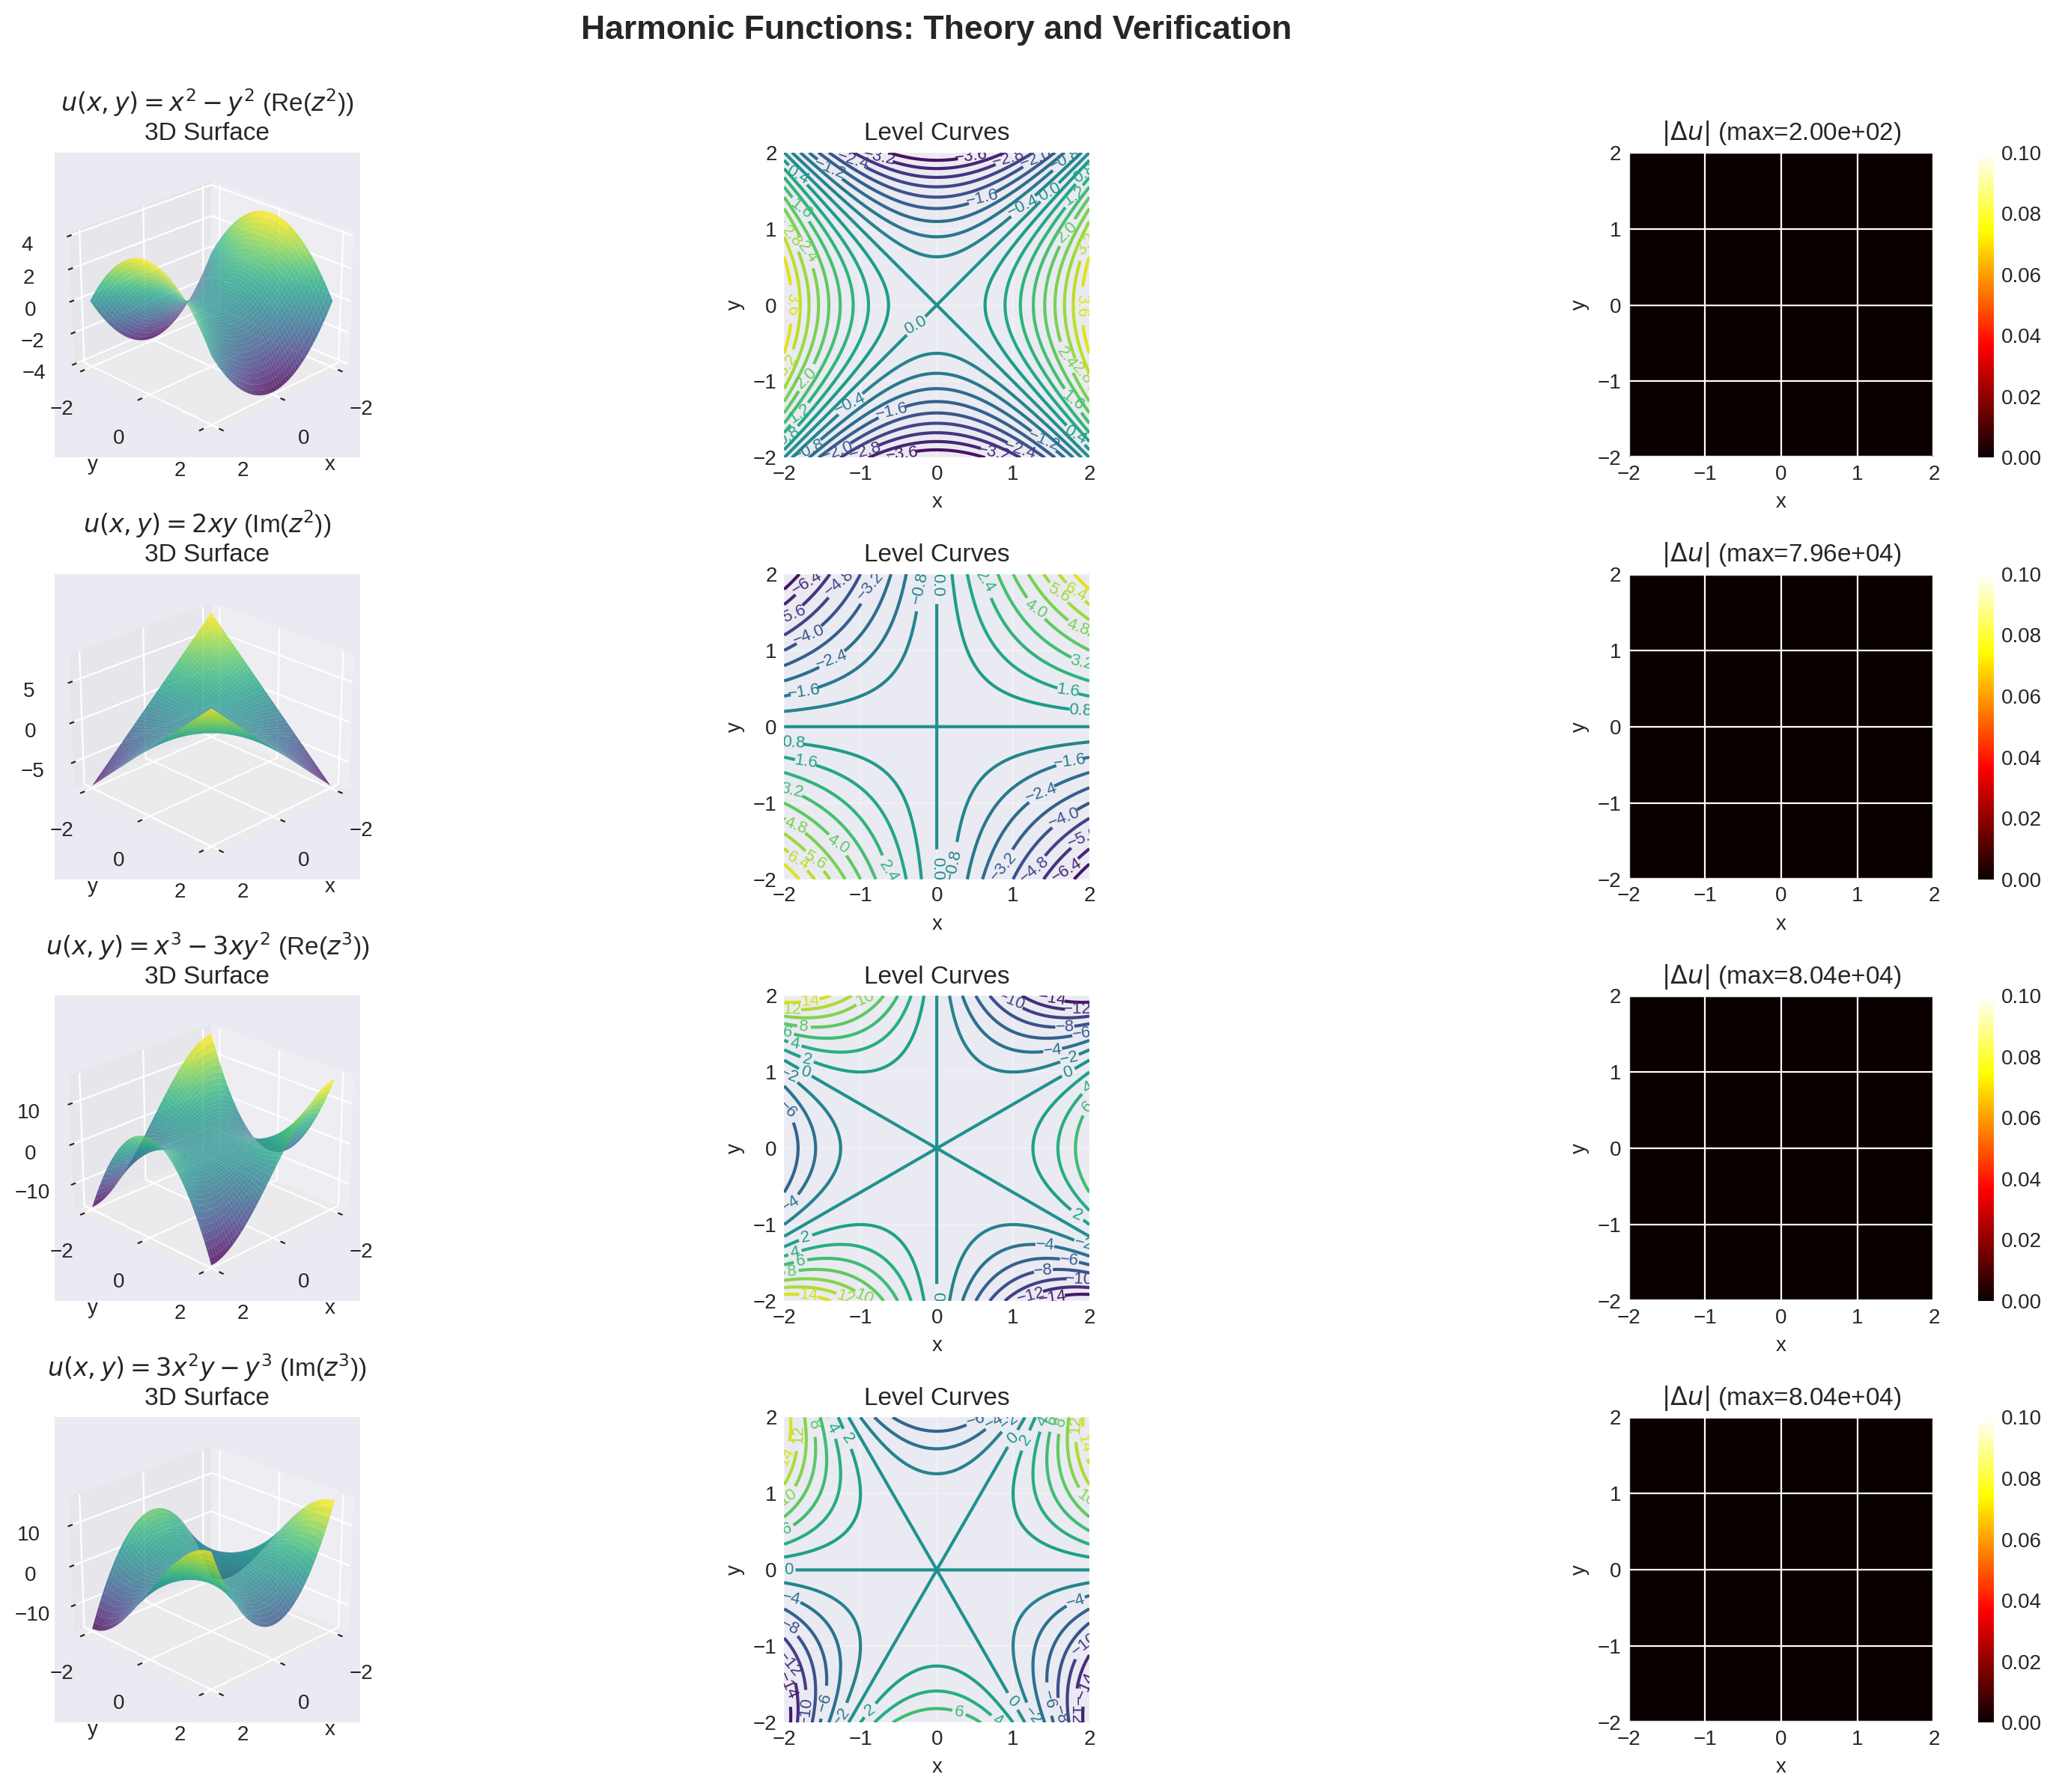

In [5]:
# Create figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# Grid for plotting
x_plot = np.linspace(-2, 2, 200)
y_plot = np.linspace(-2, 2, 200)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
Z_complex = X_plot + 1j*Y_plot

# Define multiple harmonic functions
harmonic_functions = [
    (np.real(Z_complex**2), r'$u(x,y) = x^2 - y^2$ (Re($z^2$))'),
    (np.imag(Z_complex**2), r'$u(x,y) = 2xy$ (Im($z^2$))'),
    (np.real(Z_complex**3), r'$u(x,y) = x^3 - 3xy^2$ (Re($z^3$))'),
    (np.imag(Z_complex**3), r'$u(x,y) = 3x^2y - y^3$ (Im($z^3$))')
]

# Plot each function
for idx, (u_vals, title) in enumerate(harmonic_functions):
    # 3D surface plot
    ax1 = fig.add_subplot(4, 3, 3*idx + 1, projection='3d')
    surf = ax1.plot_surface(X_plot, Y_plot, u_vals, cmap=cm.viridis, 
                           alpha=0.8, linewidth=0, antialiased=True)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('u(x,y)')
    ax1.set_title(f'{title}\n3D Surface')
    ax1.view_init(elev=25, azim=45)
    
    # Contour plot
    ax2 = fig.add_subplot(4, 3, 3*idx + 2)
    contour = ax2.contour(X_plot, Y_plot, u_vals, levels=20, cmap=cm.viridis)
    ax2.clabel(contour, inline=True, fontsize=8)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Level Curves')
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    
    # Laplacian verification
    ax3 = fig.add_subplot(4, 3, 3*idx + 3)
    laplacian = compute_laplacian_2d(u_vals, x_plot[1]-x_plot[0], y_plot[1]-y_plot[0])
    im = ax3.imshow(np.abs(laplacian), extent=[-2, 2, -2, 2], 
                    origin='lower', cmap=cm.hot, vmax=0.1)
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_title(f'$|\\Delta u|$ (max={np.max(np.abs(laplacian)):.2e})')
    plt.colorbar(im, ax=ax3)

plt.suptitle('Harmonic Functions: Theory and Verification', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('harmonic_functions_analysis.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved as 'plot.png'")
plt.show()

## 10. Conclusion

We have explored the fundamental theory of harmonic functions and verified their key properties computationally:

1. **Laplace's Equation**: Harmonic functions satisfy $\Delta u = 0$ (verified numerically)
2. **Mean Value Property**: The value at any point equals the average over surrounding circles
3. **Maximum Principle**: Extrema occur only on the boundary
4. **Connection to Complex Analysis**: Real and imaginary parts of holomorphic functions are harmonic

These functions are central to partial differential equations, potential theory, and complex analysis, with applications ranging from heat flow to electromagnetic fields.